# Регрессия со структурными сдвигами

<div style="background-color:Bisque; color:DarkBlue; padding:30px;">

<i><b><span style="color: purple"> Регрессия со структурными сдвигами </span> </b><br>

Пусть

* бинарная переменная $D$ отвечает за структурный сдвиг
* $y$ – зависимая эндогенная переменная
* $x=\begin{pmatrix} 1 & x_1 & \cdots & x_k \end{pmatrix}$ – экзогенные регрессоры/предикторы

Спецификация регрессии со структурными сдвигам вдоль переменной $D$

$$
	y=x^\top\beta+(D\cdot x)^\top\gamma+u=\beta_0+\beta_1x_1+\cdots+\gamma_0D+\gamma_1 Dx_1+\cdots+u
$$

Тогда
* $\gamma_0$ – структурный сдвиг константы
* $\gamma_j$ – структурный сдвиг "отдачи" от регрессора $x_j$ ($j=1,\ldots$)

</div>

In [1]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.api as sm

import seaborn as sns

In [3]:
df = pd.read_csv('sleep75.csv')

Рассмотрим регрессию __sleep на totwrk, age, smsa__ со сдвигами *относительно гендерной переменной male*

$$
	sleep=\beta_0+\beta_1totwrk+\beta_2age+\beta_3smsa+\gamma_0 male+\gamma_1 totwrk*male+\gamma_2age*male+\gamma_3smsa*male+u
$$

In [7]:
mod = smf.ols(formula='sleep~1+totwrk+age+smsa+male+totwrk:male+age:male+smsa:male', data=df)
#mod = smf.ols(formula='sleep~1+totwrk+age+smsa+male+totwrk*male+age*male+smsa*male', data=df) # то же самое, но с умножением, предпочтительнее первый вариант

res = mod.fit()

res.params

Intercept      3486.972664
totwrk           -0.143069
age               1.704008
smsa            -56.648913
male            135.199623
totwrk:male      -0.045190
age:male          1.499618
smsa:male       -34.734991
dtype: float64

In [13]:
#totwrk:male - структурный сдвиг totwrk относительно male

# Визуализация структурных сдвигов

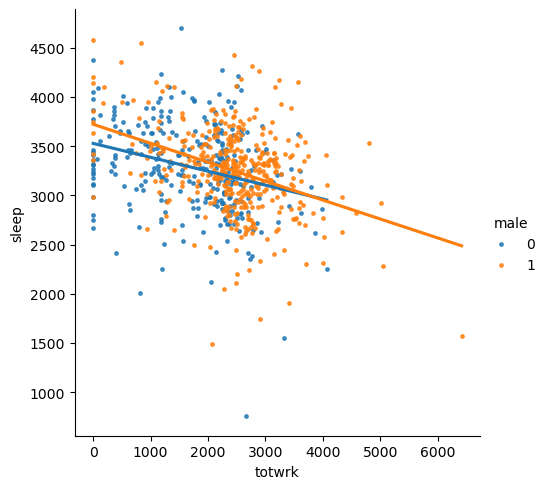

In [11]:
#тренды
sns.lmplot(data=df, x='totwrk', y='sleep', hue='male', ci=False, scatter_kws={'s':6})
#(для линейной функции)
#для квадратичной:
#sns.lmplot(data=df, x='totwrk', y='sleep', hue='male', order=2, ci=False, scatter_kws={'s':6})
#т.к. order - именованный параметр, не имеет значения, где он стоит в функции (в отличии от позиционных параметров x,y)

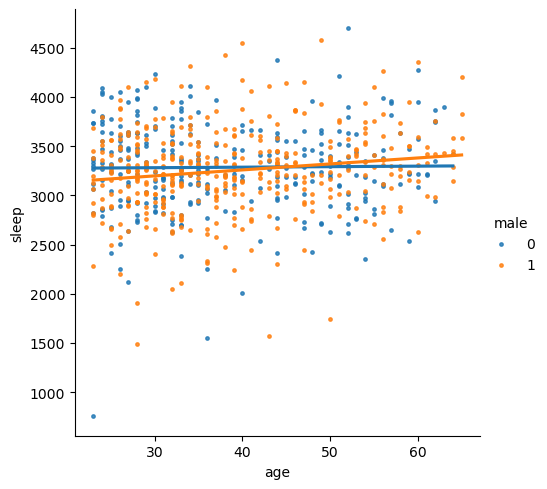

In [12]:
sns.lmplot(data=df, x='age', y='sleep', hue='male', ci=False, scatter_kws={'s':6})